In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import librosa


In [ ]:
y , sr = librosa.load(librosa.util.example_audio_file())

In [ ]:
import IPython.display as ipd


In [ ]:
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
print(y.shape,sr)

(1355168,) 22050


In [ ]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

In [ ]:
plt.figure(figsize=(20, 5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

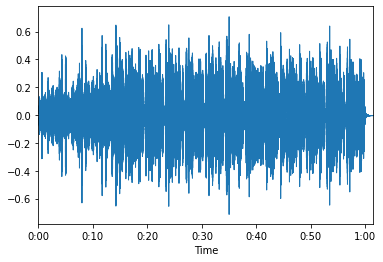

In [ ]:
librosa.display.waveplot(y, sr=sr)

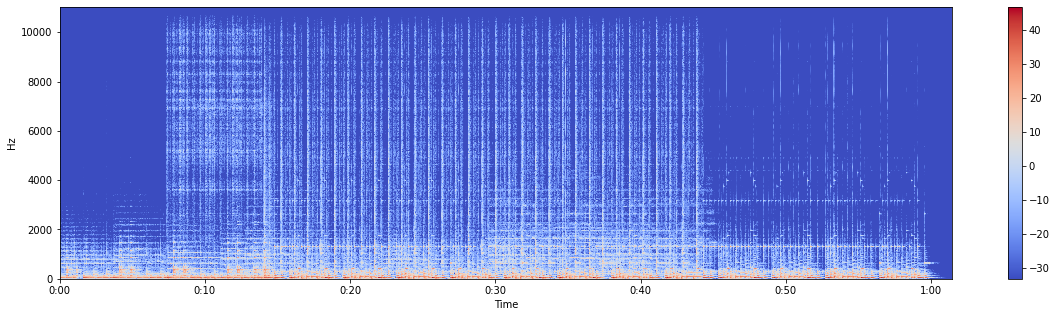

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

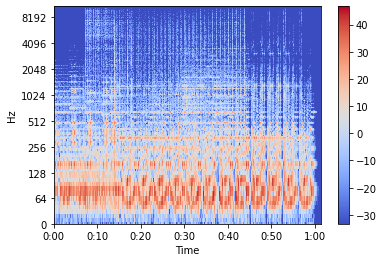

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)

In [ ]:
ipd.Audio(x, rate=sr)

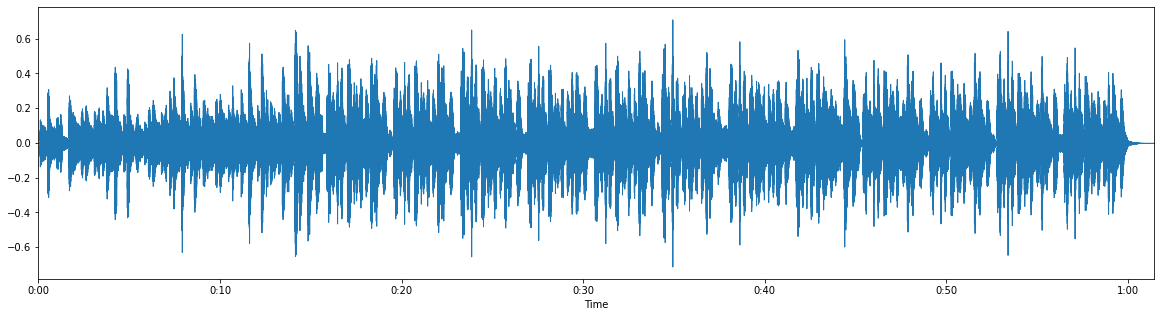

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(y, sr=sr)

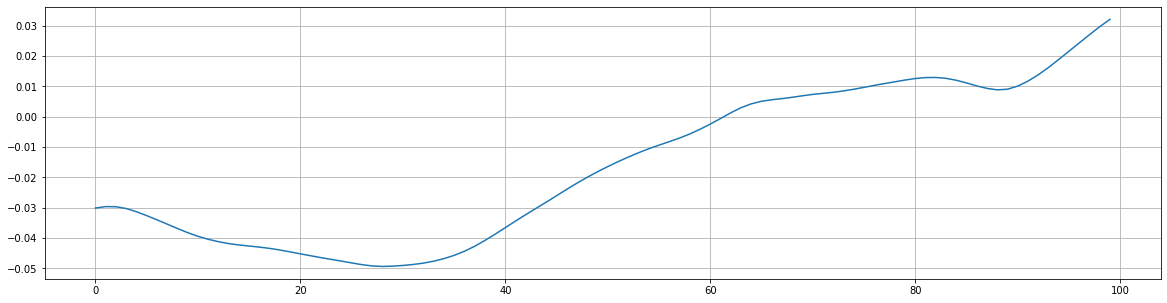

In [ ]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(y[n0:n1])
plt.grid()

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
spectral_centroids.shape

(2647,)

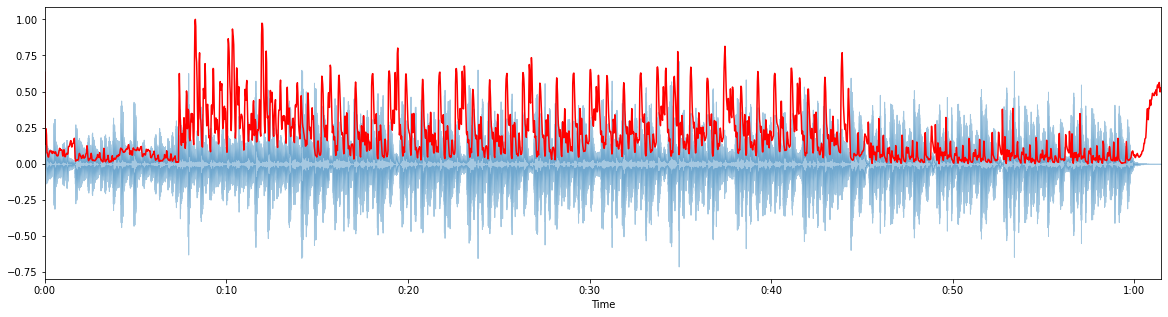

In [ ]:
plt.figure(figsize=(20,5))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

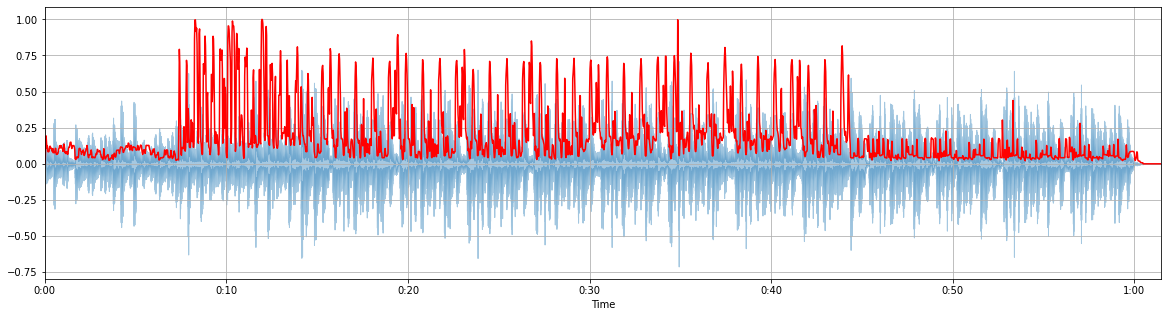

In [ ]:
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.grid()

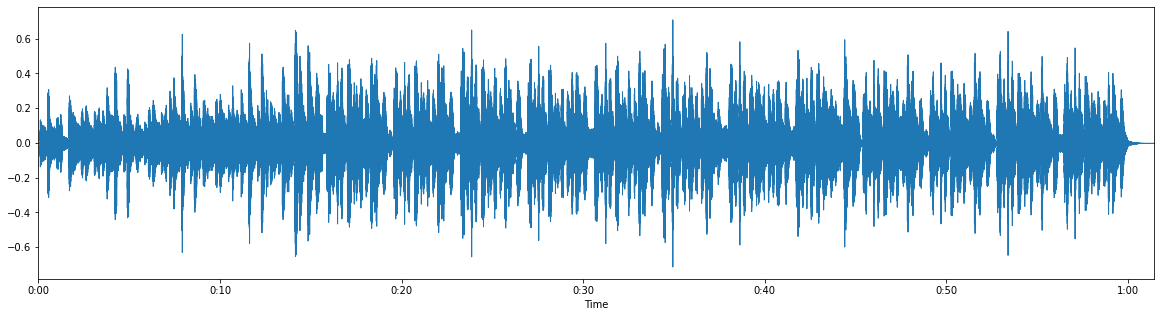

In [ ]:
plt.figure(figsize=(20,5))
librosa.display.waveplot(y, sr=sr)

(20, 2647)


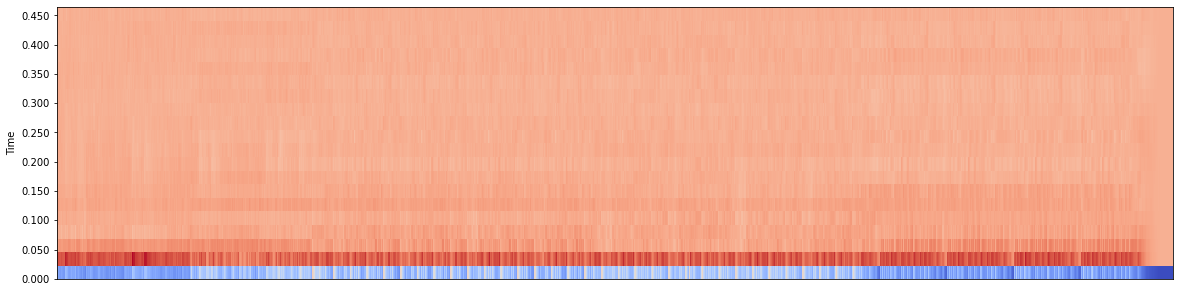

In [ ]:
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(y, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, y_axis='time')

In [ ]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[ 5.7645595e-09  0.0000000e+00  5.7645595e-09  0.0000000e+00
  0.0000000e+00  5.7645595e-09  1.4411399e-08  0.0000000e+00
  2.8822797e-09 -8.6468397e-09 -1.1529119e-08 -2.8822797e-09
  0.0000000e+00  0.0000000e+00  0.0000000e+00  5.7645595e-09
  1.1529119e-08  0.0000000e+00  0.0000000e+00  0.0000000e+00]
[1.        1.0000002 1.        1.        1.        0.9999999 0.9999999
 1.        1.0000002 1.        1.        1.        1.        1.
 1.0000002 1.        1.        1.0000001 1.0000001 1.0000001]


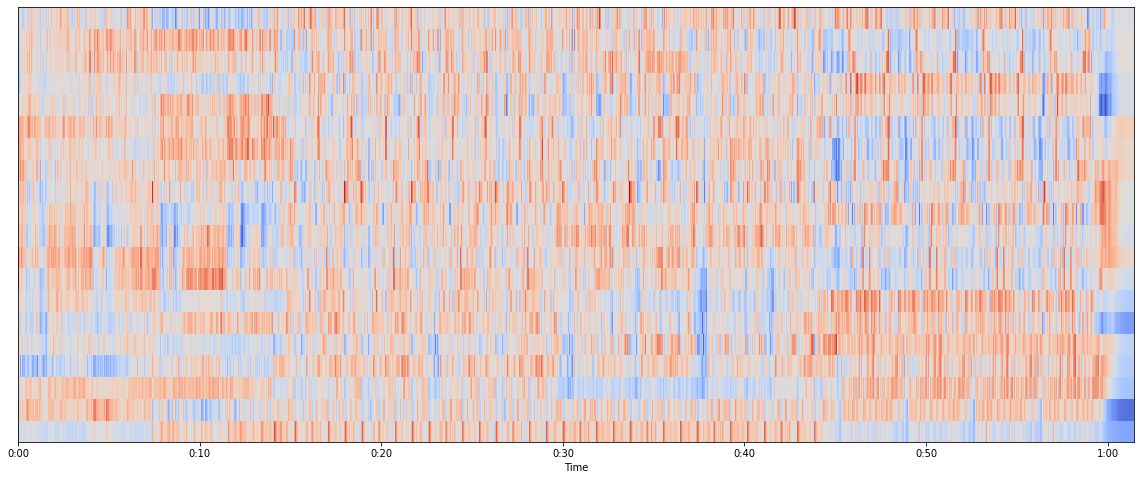

In [ ]:
plt.figure(figsize=(20,8))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')